In [59]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df =pd.read_csv(mouse_drug_data_to_load)
clinical_trial_df= pd.read_csv(clinical_trial_data_to_load)
clinical_trial_df
# Combine the data into a single dataset
df = pd.merge(clinical_trial_df, mouse_data_df, on='Mouse ID', how="right")
mouse_clinical_trail_df = df
#Display the data table for preview
#clinical_trial_df
mouse_clinical_trail_df
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0



## Tumor Response to Treatment

In [72]:


#columns are = 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites','Drug'

# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
#keep original data as untouched
df_for_calculation = mouse_clinical_trail_df

# Convert to DataFrame,
tumor_Responce_df = df_for_calculation.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()
#tumor_Responce_df = pd.DataFrame(tumor_Responce_df_1[['Drug', 'Timepoint', 'Tumor Volume (mm3)']])
# Preview DataFram
tumor_Responce_df.head(11)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [80]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_stErr_df =df_for_calculation.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()
# Convert to DataFrame
tumor_stErr_df
# Preview DataFrame
tumor_stErr_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [103]:
# Minor Data Munging to Re-Format the Data Frames
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
#df.pivot(columns='var',values = 'val')
tumor_Responce_pivot_df = pd.pivot(tumor_Responce_df, index='Timepoint', columns='Drug',values="Tumor Volume (mm3)")
# Preview that Reformatting worked
tumor_Responce_pivot_df.head(11)

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


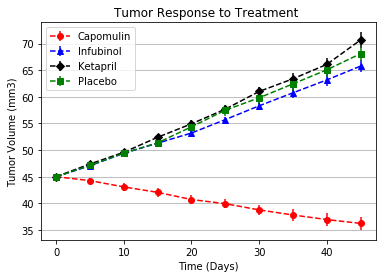

In [123]:
#tumor_Responce_pivot_df.describe()
trp_plot_df = tumor_Responce_pivot_df.reset_index()
Capomulin_error = tumor_stErr_df.loc[tumor_stErr_df["Drug"] == "Capomulin", "Tumor Volume (mm3)"]
Infubinol_error = tumor_stErr_df.loc[tumor_stErr_df["Drug"] == "Infubinol", "Tumor Volume (mm3)"]
Ketapril_error = tumor_stErr_df.loc[tumor_stErr_df["Drug"] == "Ketapril", "Tumor Volume (mm3)"]
Placebo_error = tumor_stErr_df.loc[tumor_stErr_df["Drug"] == "Placebo", "Tumor Volume (mm3)"]

# Generate the Plot (with Error Bars)
plt.errorbar(trp_plot_df.Timepoint, trp_plot_df.Capomulin, yerr = Capomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(trp_plot_df.Timepoint, trp_plot_df.Infubinol,yerr = Infubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(trp_plot_df.Timepoint, trp_plot_df.Ketapril, yerr = Ketapril_error, label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.errorbar(trp_plot_df.Timepoint, trp_plot_df.Placebo,  yerr = Placebo_error, label= "Placebo", marker= "s", color="green", linestyle='--')

# Save the Figure
plt.legend()
plt.title("Tumor Response to Treatment ")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(axis='y')


# Save the Figure
plt.savefig("Tumor_Response.png")

plt.show()



## Metastatic Response to Treatment

In [134]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
Metastatic_Respons_df = mouse_clinical_trail_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

# Preview DataFrame
Metastatic_Respons_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [140]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
#.sem().reset_index()
# Convert to DataFrame
stErr_Met_Respons_df = mouse_clinical_trail_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()
# Preview DataFrame
stErr_Met_Respons_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [142]:
# Minor Data Munging to Re-Format the Data Frames
#trp_plot_df = tumor_Responce_pivot_df.reset_index()
Met_Respons_df_pivot_df = pd.pivot(Metastatic_Respons_df, index='Timepoint', columns='Drug',values="Metastatic Sites")
# Preview that Reformatting worked
Met_Respons_df_pivot_df 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


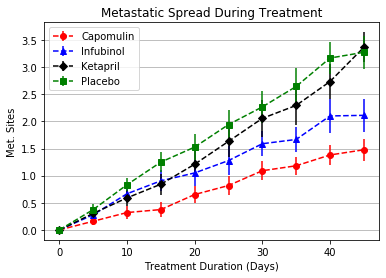

In [147]:
# Generate the Plot (with Error Bars)
plt_met_rep_df = Met_Respons_df_pivot_df.reset_index()
#plt_met_rep_df
mCapomulin_error = stErr_Met_Respons_df.loc[stErr_Met_Respons_df["Drug"] == "Capomulin", "Metastatic Sites"]
mInfubinol_error = stErr_Met_Respons_df.loc[stErr_Met_Respons_df["Drug"] == "Infubinol", "Metastatic Sites"]
mKetapril_error = stErr_Met_Respons_df.loc[stErr_Met_Respons_df["Drug"] == "Ketapril", "Metastatic Sites"]
mPlacebo_error = stErr_Met_Respons_df.loc[stErr_Met_Respons_df["Drug"] == "Placebo", "Metastatic Sites"]

# Generate the Plot (with Error Bars)
plt.errorbar(plt_met_rep_df.Timepoint, plt_met_rep_df.Capomulin, yerr = mCapomulin_error, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.errorbar(plt_met_rep_df.Timepoint, plt_met_rep_df.Infubinol,yerr = mInfubinol_error, label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.errorbar(plt_met_rep_df.Timepoint, plt_met_rep_df.Ketapril, yerr = mKetapril_error, label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.errorbar(plt_met_rep_df.Timepoint,plt_met_rep_df.Placebo,  yerr = mPlacebo_error, label= "Placebo", marker= "s", color="green", linestyle='--')

# Save the Figure
plt.legend()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(axis='y')


# Save the Figure
plt.savefig("Metastatic_Spread.png")

plt.show()


## Survival Rates

In [157]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates_df = mouse_clinical_trail_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count().reset_index()
# Convert to DataFrame
survival_rates_df.rename(columns={"Mouse ID": "Mouse_Count"}, inplace=True)
# Preview DataFrame
survival_rates_df.head()

,Drug,Timepoint,Mouse_Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [160]:
# Minor Data Munging to Re-Format the Data Frames
Met_Respons_df_pivot_df = pd.pivot(Metastatic_Respons_df, index='Timepoint', columns='Drug',values="Metastatic Sites")
survival_rates_pivot_df =pd.pivot(survival_rates_df, index ='Timepoint', columns='Drug', values='Mouse_Count' )
# Preview the Data Frame
survival_rates_pivot_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [161]:
plt_Survival_df = survival_rates_pivot_df.reset_index()
plt_Survival_df

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17
5,25,22,18,18,19,18,17,14,23,19,16
6,30,22,16,17,18,15,15,13,23,18,15
7,35,22,14,12,17,15,14,10,21,16,14
8,40,21,14,10,15,15,12,9,20,12,14
9,45,21,13,9,11,13,11,7,20,11,14


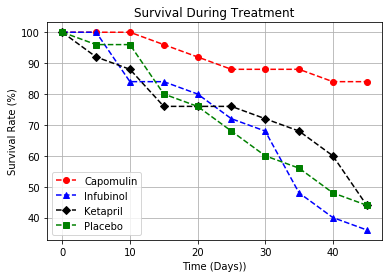

In [169]:
# Generate the Plot (Accounting for percentages)
plt_Survival_df = survival_rates_pivot_df.reset_index()
#plt_Survival_df
plt.plot(plt_Survival_df.Timepoint, plt_Survival_df['Capomulin']/plt_Survival_df['Capomulin'].max() * 100, label= "Capomulin", marker= "o", color="red", linestyle='--')
plt.plot(plt_Survival_df.Timepoint, plt_Survival_df['Infubinol']/plt_Survival_df['Infubinol'].max() * 100 , label= "Infubinol", marker= "^", color="blue", linestyle='--')
plt.plot(plt_Survival_df.Timepoint, plt_Survival_df.Ketapril/plt_Survival_df.Ketapril.max() * 100,  label= "Ketapril", marker= "D", color="black", linestyle='--')
plt.plot(plt_Survival_df.Timepoint, plt_Survival_df.Placebo/plt_Survival_df.Placebo.max() * 100,   label= "Placebo", marker= "s", color="green", linestyle='--')


# Save the Figure
plt.legend()
plt.title("Survival During Treatment")
plt.xlabel("Time (Days))")
plt.ylabel("Survival Rate (%)")
plt.grid()


# Save the Figure
plt.savefig("Survival_During_Treatement.png")

plt.show()

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)